In [0]:
#IST718_LAb3_Tensor_fashionMnist
#Beverlyn_Tucker

In [0]:
from tensorflow.keras import datasets             # for keras MNIST datasets

from sklearn.metrics import confusion_matrix      # for prediction verification
import matplotlib.pyplot as plt                   # for plotting
import numpy as np                                # for np functions
import seaborn as sns; sns.set()                  # for heatmap
from sklearn.metrics import classification_report # to print classification accuracy
from tensorflow.keras.utils import to_categorical # to convert data to categorical
from tensorflow.keras import layers               # for Neural Network layers

from tensorflow.keras import Sequential           # for Neural Network
from keras.callbacks import ModelCheckpoint       #for  Neural Network callback
from sklearn.naive_bayes import GaussianNB        # for GNB
from sklearn.tree import DecisionTreeClassifier   # for decision Tree classfier


In [0]:
# import data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [0]:
# image labels
label_name = [ 't-shirt',
    'trouser',
    'pullover',
    'dress',
    'coat',
    'sandal',
    'shirt',
    'sneaker',
    'bag',
    'ankle-boot']


In [0]:
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32')/ 255

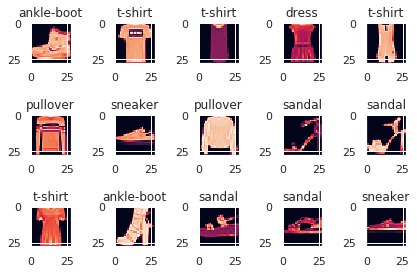

In [24]:
#Train labels dataset
fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
  axi.imshow(x_train[i])
  axi.set_title(label_name[y_train[i]])
plt.show()

In [25]:
#GNB_Model
# Reshape input data to naive bayes algorithm
w, h = 28, 28
gnb_x_train = x_train.reshape(x_train.shape[0], w*h)
gnb_x_test = x_test.reshape(x_test.shape[0], w*h)

gnb_model = GaussianNB()
%time gnb_model.fit(gnb_x_train, y_train)

CPU times: user 391 ms, sys: 4.05 ms, total: 395 ms
Wall time: 395 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
gnb_y_fit = gnb_model.predict(gnb_x_test)
gnb_y_fit

array([7, 4, 1, ..., 3, 1, 7], dtype=uint8)

In [27]:
#Print classification report
print(classification_report(y_test, gnb_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     t-shirt       0.81      0.59      0.68      1000
     trouser       0.64      0.94      0.76      1000
    pullover       0.59      0.32      0.42      1000
       dress       0.44      0.55      0.49      1000
        coat       0.38      0.78      0.51      1000
      sandal       0.93      0.28      0.43      1000
       shirt       0.32      0.04      0.07      1000
     sneaker       0.51      0.99      0.67      1000
         bag       0.83      0.71      0.77      1000
  ankle-boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



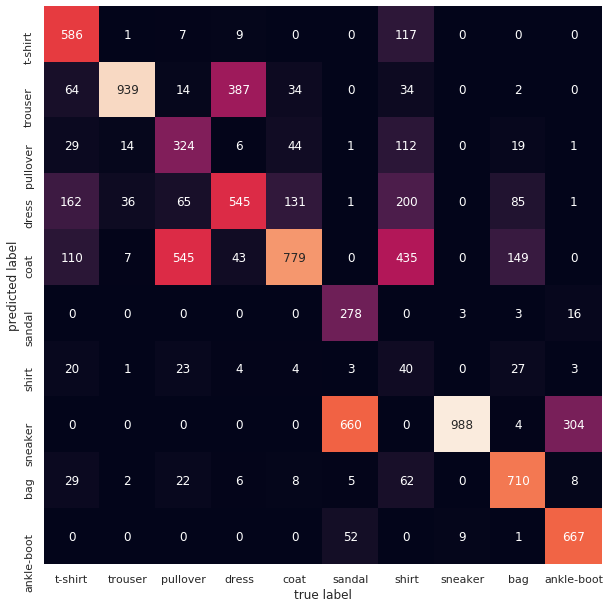

In [28]:
mat = confusion_matrix(y_test, gnb_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [56]:
#DecisionTreeClassifier 
# Reshape input data to fit decision tree algorithm
w, h = 28, 28
dtc_x_train = x_train.reshape(x_train.shape[0], w*h)
dtc_x_test = x_test.reshape(x_test.shape[0], w*h)

dtc_model = DecisionTreeClassifier()
%time dtc_model.fit(dtc_x_train, y_train)

CPU times: user 56 s, sys: 12.1 ms, total: 56 s
Wall time: 56.1 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dtc_y_fit = dtc_model.predict(dtc_x_test)


In [58]:
print(classification_report(y_test, dtc_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     t-shirt       0.74      0.73      0.74      1000
     trouser       0.96      0.95      0.96      1000
    pullover       0.64      0.66      0.65      1000
       dress       0.80      0.78      0.79      1000
        coat       0.65      0.64      0.64      1000
      sandal       0.91      0.88      0.90      1000
       shirt       0.52      0.54      0.53      1000
     sneaker       0.87      0.89      0.88      1000
         bag       0.91      0.91      0.91      1000
  ankle-boot       0.89      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



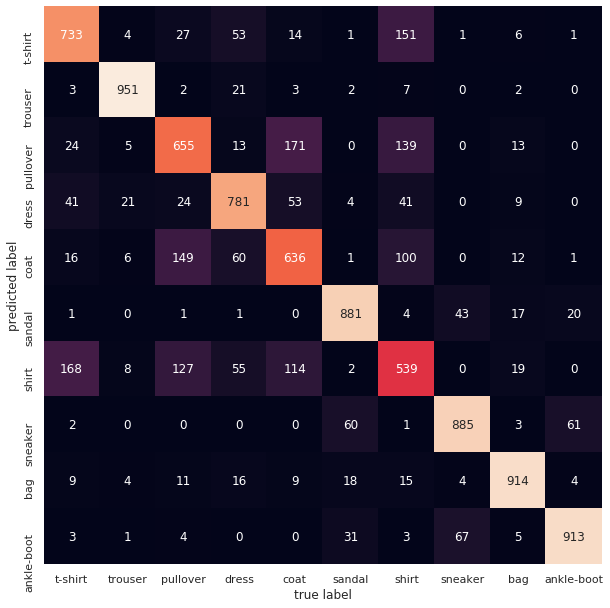

In [59]:
mat = confusion_matrix(y_test, dtc_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:

# Reshape input data to fit neural network algorithm
w, h = 28, 28
nnt_x_train = x_train.reshape(x_train.shape[0], w, h, 1)
nnt_x_test = x_test.reshape(x_test.shape[0], w, h, 1)
nnt_y_train = to_categorical(y_train, 10)

In [34]:
nnt_model = Sequential()

# Must define the input shape in the first layer of the neural network
nnt_model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
nnt_model.add(layers.MaxPooling2D(pool_size=2))
nnt_model.add(layers.Dropout(0.3))

nnt_model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nnt_model.add(layers.MaxPooling2D(pool_size=2))
nnt_model.add(layers.Dropout(0.3))

nnt_model.add(layers.Flatten())
nnt_model.add(layers.Dense(256, activation='relu'))
nnt_model.add(layers.Dropout(0.5))
nnt_model.add(layers.Dense(10, activation='softmax'))

nnt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
%time nnt_model.fit(nnt_x_train, nnt_y_train, batch_size=64, epochs=10, callbacks=[checkpointer])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.5869 - acc: 0.7849
Epoch 2/10
  128/60000 [..............................] - ETA: 1:16 - loss: 0.6730 - acc: 0.7578

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 76s 1ms/sample - loss: 0.4118 - acc: 0.8511
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3630 - acc: 0.8666
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3442 - acc: 0.8739
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3220 - acc: 0.8822
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3077 - acc: 0.8872
Epoch 7/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2942 - acc: 0.8915
Epoch 8/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2845 - acc: 0.8956
Epoch 9/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.2741 - acc: 0.8993
Epoch 10/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2671 - acc: 0.8999
CPU times: user 21min 57s, sys: 38.2 s, total: 22min 35s
Wall time: 12min 47s


In [0]:
# Convert nn_model prediction results
nnt_prediction_results = nnt_model.predict(nnt_x_test)
nnt_y_fit = np.full((10000,), 0, dtype='uint8')

for i in range(0, len(nnt_prediction_results)-1, 1):
  nnt_y_fit[i] = np.argmax(nnt_prediction_results[i])

In [36]:
print(classification_report(y_test, nnt_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     t-shirt       0.85      0.88      0.87      1000
     trouser       0.99      0.98      0.98      1000
    pullover       0.84      0.88      0.86      1000
       dress       0.90      0.91      0.91      1000
        coat       0.81      0.91      0.86      1000
      sandal       0.98      0.99      0.98      1000
       shirt       0.82      0.65      0.73      1000
     sneaker       0.95      0.96      0.96      1000
         bag       0.98      0.98      0.98      1000
  ankle-boot       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



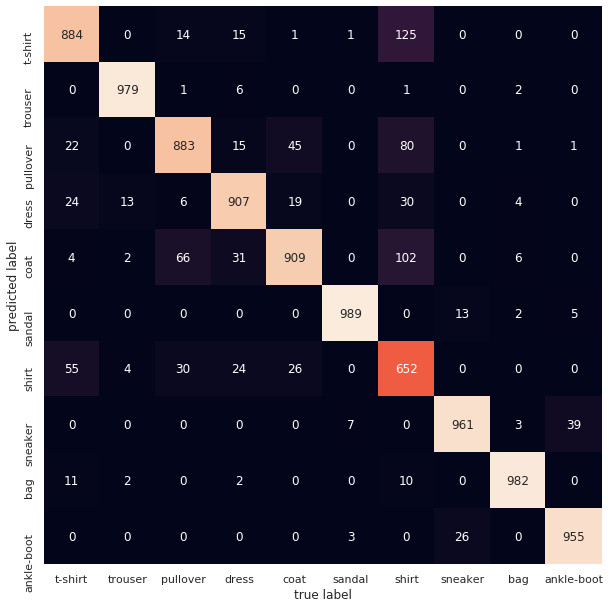

In [39]:

mat = confusion_matrix(y_test, nnt_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');